#Import Libraries, Read in Training Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [3]:
import pandas as pd
#import zipfile

# Unzip the file
#with zipfile.ZipFile('/content/project_2_training.csv.zip', 'r') as zip_ref:
   # zip_ref.extractall('')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning- S3/Project 2- Finding Fraud/project_2_training.csv')

# Display the first few rows of the dataframe
df.head()


,EVENT_ID,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,...,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,2608000,5774.0,2172.0,78.0,4523.0,81.237.240.91,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_0 like M...,graves.org,456-910-9478,South Angelaville,...,R,2021-02-21 16:32:23,Kristi Bell,7683 Chavez Curve,882-35-3409,es_VE,Q,82.0,4609.0,legit
1,214500,5405.0,2887.0,51.0,4057.0,160.32.216.178,Mozilla/5.0 (Macintosh; PPC Mac OS X 10 10_7) ...,howard-madden.com,269.363.8079,Lake Leslietown,...,O,2020-12-30 11:36:17,Amanda Bond,628 Cline Streets,453-93-1357,bhb_IN,S,2.0,12384.0,legit
2,294600,6570.0,2887.0,56.0,5602.0,109.156.235.28,Mozilla/5.0 (Windows NT 6.2) AppleWebKit/535.2...,walsh-goodwin.com,366.185.9975,Lake Kendra,...,C,2021-03-24 05:34:28,Joanna Walton,268 Ashley Plaza Apt. 416,554-51-8940,mi_NZ,W,43.0,9607.0,legit
3,477060,3865.0,1591.0,58.0,3926.0,158.152.249.45,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,gonzalez-diaz.com,816-365-8213,East Maryport,...,G,2021-10-12 16:24:49,Matthew Johnson,8377 Jacob Course,492-66-7677,yue_HK,Y,71.0,10305.0,legit
4,1993100,6625.0,3297.0,70.0,6675.0,167.164.91.31,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,bender-rocha.info,001-970-935-1735x19620,Yorkburgh,...,W,2021-06-23 00:05:15,Susan Phillips,401 Christopher Meadows,468-86-6030,gd_GB,Q,52.0,4139.0,legit


#Data Exploration and Preprocessing

In [4]:
# Identify categorical and numerical columns
categorical_cols = ['tranaction_initiate']
numerical_cols = ["account_age_days",	"transaction_amt",	"transaction_adj_amt",	"historic_velocity"]
feature_names = categorical_cols + numerical_cols
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the target variable
y = df['EVENT_LABEL'].map({'legit': 0, 'fraud': 1})  # Convert to binary
X = df.drop('EVENT_LABEL', axis=1)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X[feature_names], y, test_size=0.3, random_state=0)


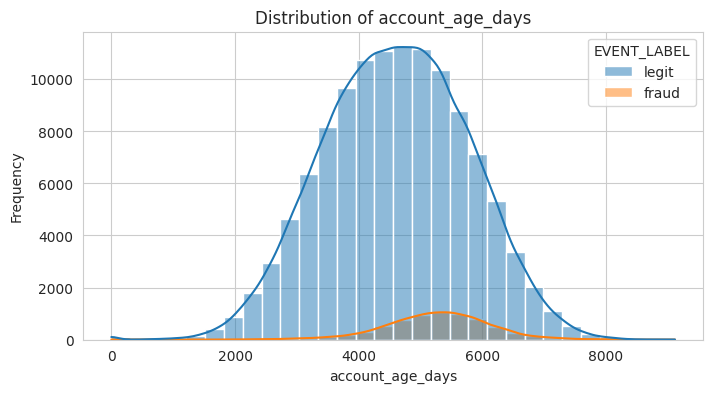

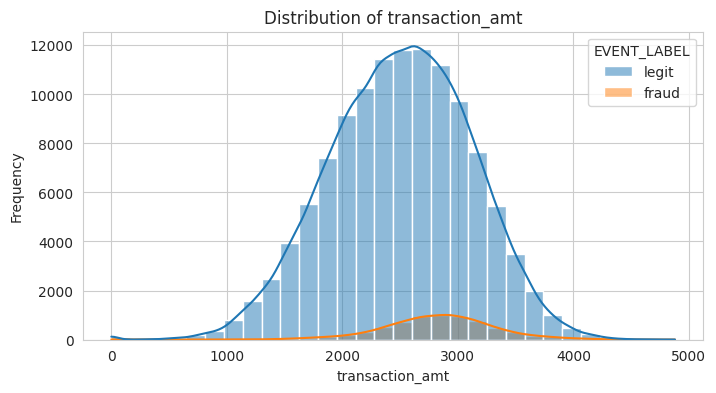

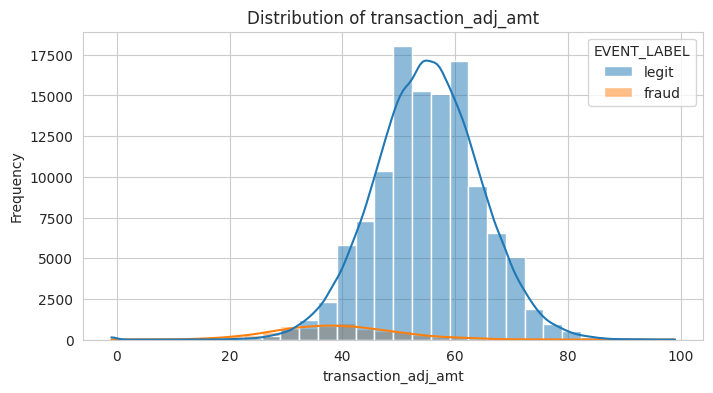

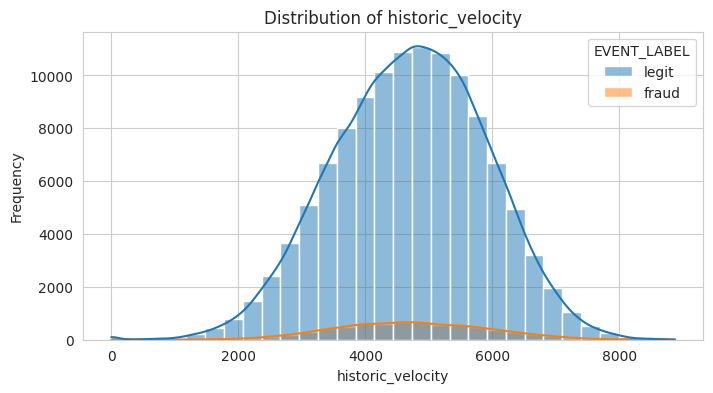

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data= df, x=col, hue="EVENT_LABEL", kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


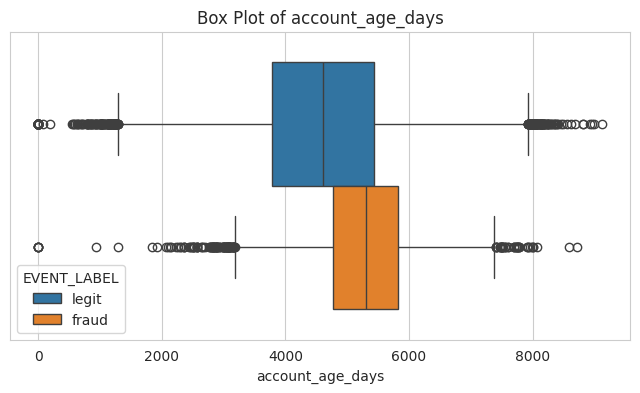

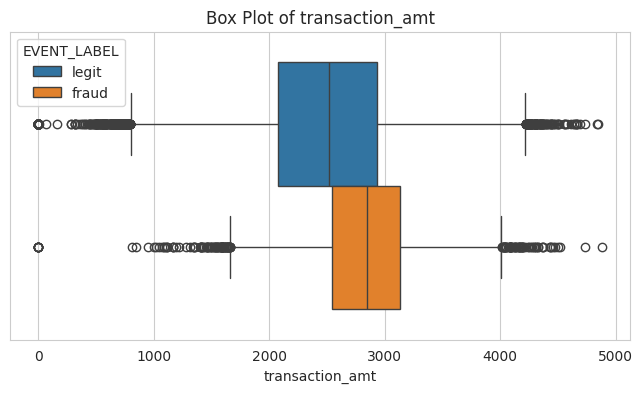

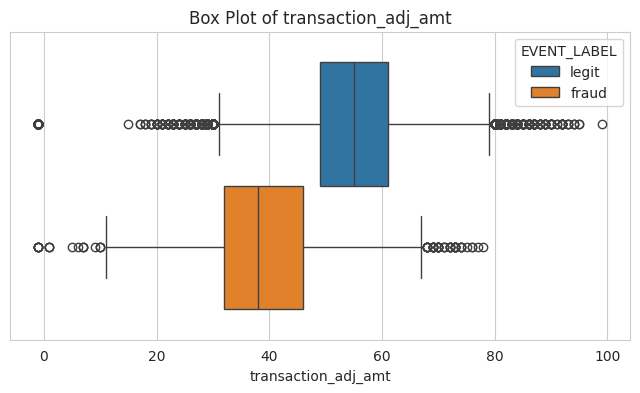

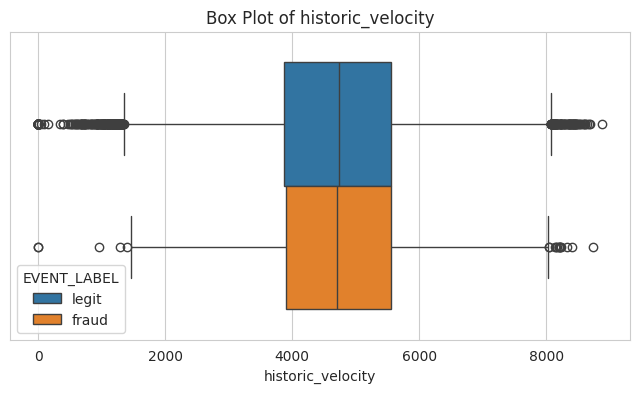

In [6]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data= df, x=col, hue="EVENT_LABEL")
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()


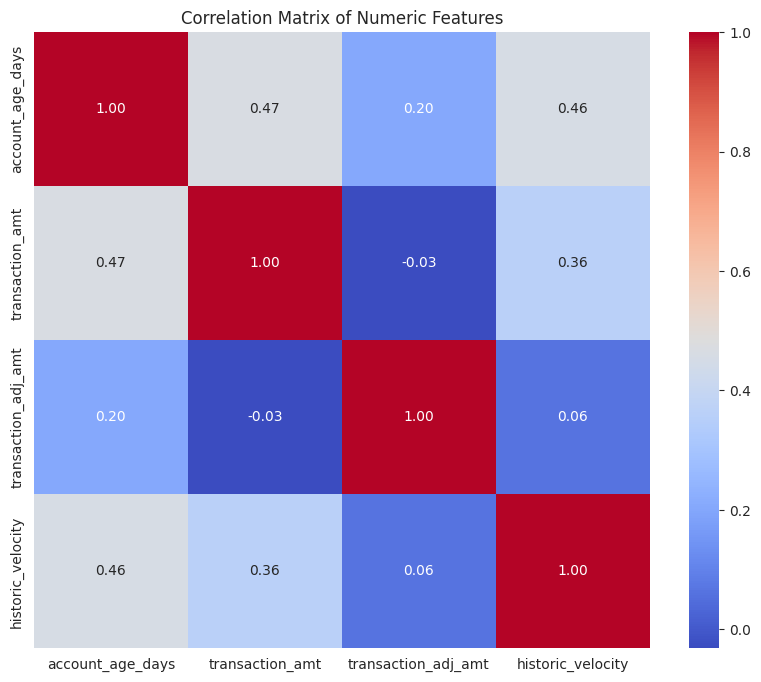

In [7]:
# Compute the correlation matrix
corr = df[numerical_cols].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


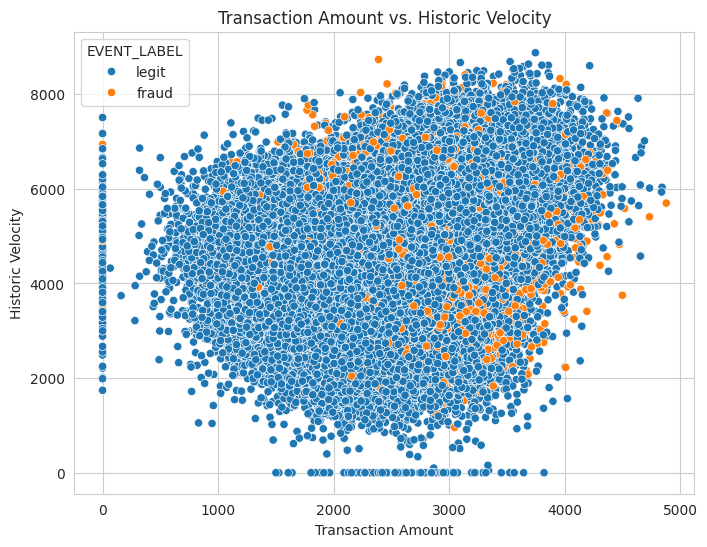

In [8]:
# Example scatter plot between 'transaction_amt' and 'historic_velocity'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='transaction_amt', y='historic_velocity', hue='EVENT_LABEL')
plt.title('Transaction Amount vs. Historic Velocity')
plt.xlabel('Transaction Amount')
plt.ylabel('Historic Velocity')
plt.show()


#Model Development

#Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the Logistic Regression pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=0, max_iter=300))])

# Train the Logistic Regression model
lr_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
lr_predictions = lr_pipeline.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_predictions):.4f}")
print(f"  AUC: {roc_auc_score(y_test, lr_predictions):.4f}")
print(f"  Precision: {precision_score(y_test, lr_predictions):.4f}")
print(f"  Recall: {recall_score(y_test, lr_predictions):.4f}")
print(f"  F1: {f1_score(y_test, lr_predictions):.4f}")

Logistic Regression Accuracy: 0.9566
  AUC: 0.6570
  Precision: 0.7424
  Recall: 0.3204
  F1: 0.4476


In [10]:
# prompt: extract feature names and position from pipeline to do logisic feature importance

feature_names = preprocessor.get_feature_names_out()
feature_importance = lr_pipeline.named_steps['classifier'].coef_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance[0]})
feature_importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

,feature,importance
0,num__account_age_days,1.076473
1,num__transaction_amt,0.497455
2,cat__tranaction_initiate_N,0.202262
3,cat__tranaction_initiate_S,0.092238
4,cat__tranaction_initiate_A,0.089864
5,cat__tranaction_initiate_D,0.088272
6,cat__tranaction_initiate_Z,0.078134
7,cat__tranaction_initiate_U,0.067714
8,cat__tranaction_initiate_J,0.063638
9,cat__tranaction_initiate_X,0.053998


In [11]:
# Logistic Regression coefficients as feature importance
lr_coefficients = lr_pipeline.named_steps['classifier'].coef_[0]

# Aligning feature names and coefficients
lr_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lr_coefficients})
lr_feature_importance_df = lr_feature_importance_df.sort_values(by='Coefficient', ascending=False)
lr_feature_importance_df.head(10)


,Feature,Coefficient
0,num__account_age_days,1.076473
1,num__transaction_amt,0.497455
17,cat__tranaction_initiate_N,0.202262
22,cat__tranaction_initiate_S,0.092238
4,cat__tranaction_initiate_A,0.089864
7,cat__tranaction_initiate_D,0.088272
29,cat__tranaction_initiate_Z,0.078134
24,cat__tranaction_initiate_U,0.067714
13,cat__tranaction_initiate_J,0.063638
27,cat__tranaction_initiate_X,0.053998


#Random Forest

In [12]:
X_train.head()

,tranaction_initiate,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity
71132,E,5906.0,2875.0,56.0,4427.0
7492,U,3175.0,1712.0,59.0,2474.0
91459,S,4349.0,3780.0,31.0,5333.0
5289,Y,5914.0,1653.0,48.0,4962.0
120014,T,2882.0,2259.0,35.0,3739.0


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=50, n_jobs = -1, random_state=0))])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
rf_predictions = rf_pipeline.predict(X_test)
rf_predictions_proba = rf_pipeline.predict_proba(X_test)[:,1]
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")
print(f"  AUC: {roc_auc_score(y_test, rf_predictions):.4f}")
print(f"  Precision: {precision_score(y_test, rf_predictions):.4f}")
print(f"  Recall: {recall_score(y_test, rf_predictions):.4f}")
print(f"  F1: {f1_score(y_test, rf_predictions):.4f}")


Random Forest Accuracy: 0.9599
  AUC: 0.6935
  Precision: 0.7610
  Recall: 0.3942
  F1: 0.5193


In [14]:
# Create the parameter grid
param_grid = {
    'classifier__n_estimators': [20, 30, 50],
    #'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [ 5, 10],
    #'classifier__min_samples_leaf': [1, 2, 4]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best set of hyperparameters
print("Best parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters:
  classifier__min_samples_split: 10
  classifier__n_estimators: 50


In [15]:
# Initialize the pipeline with the preprocessor and a Random Forest classifier
rf_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=50,
                                                                    min_samples_split=10,
                                                                    max_depth = 10,
                                                                    n_jobs=-1,
                                                                    random_state=42))])
# Train the pipeline
rf_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['account_age_days',
                                                   'transaction_amt',
                                                   'transaction_adj_amt',
                                                   'historic_velocity']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['tranaction_initiate'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_split=10,
                                        n_estimators=50, n_jobs=-1,
                                        random_state=42))])

In [16]:
# compare rf_pipeline to rf_pipeline_hpo performance
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]
y_pred_rf_hpo = rf_pipeline_hpo.predict(X_test)
y_pred_proba_rf_hpo = rf_pipeline_hpo.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)


# Evaluation Metrics
print("Random Forest Model Evaluation:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  AUC: {auc_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")
print(f"  F1: {f1_score(y_test, y_pred_rf):.4f}")
print("\n -------- \n")
print("Random Forest Model Evaluation with HPO:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rf_hpo):.4f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_rf_hpo):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_rf_hpo):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_rf_hpo):.4f}")
print(f"  F1: {f1_score(y_test, y_pred_rf_hpo):.4f}")


Random Forest Model Evaluation:
  Accuracy: 0.9599
  AUC: 0.8875
  Precision: 0.7610
  Recall: 0.3942
  F1: 0.5193

 -------- 

Random Forest Model Evaluation with HPO:
  Accuracy: 0.9569
  AUC: 0.9088
  Precision: 0.8488
  Recall: 0.2617
  F1: 0.4000


#**False Positive Rate for RF Question - set the threshold to 0.126603**

In [17]:
from sklearn.metrics import roc_curve
import numpy as np
# Predict probabilities for the positive class
y_scores = rf_pipeline_hpo.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# Define target FPR values
target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, fpr, tpr)
interp_thresholds = np.interp(target_fpr, fpr, thresholds)

# Print the results
for i in range(len(target_fpr)):
    print(f"Target FPR: {target_fpr[i]:.2f}, Expected TPR: {interp_tpr[i]:.4f}, Threshold: {interp_thresholds[i]:.4f}")


Target FPR: 0.01, Expected TPR: 0.4107, Threshold: 0.3717
Target FPR: 0.02, Expected TPR: 0.5180, Threshold: 0.2752
Target FPR: 0.03, Expected TPR: 0.5883, Threshold: 0.1977
Target FPR: 0.04, Expected TPR: 0.6447, Threshold: 0.1508
Target FPR: 0.05, Expected TPR: 0.6791, Threshold: 0.1266
Target FPR: 0.06, Expected TPR: 0.7083, Threshold: 0.1102
Target FPR: 0.07, Expected TPR: 0.7320, Threshold: 0.0964
Target FPR: 0.08, Expected TPR: 0.7529, Threshold: 0.0852
Target FPR: 0.09, Expected TPR: 0.7641, Threshold: 0.0772
Target FPR: 0.10, Expected TPR: 0.7782, Threshold: 0.0702


In [18]:
import pandas as pd

# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Display the DataFrame
target_fpr_df


,Target FPR (%),Expected TPR,Threshold
0,1.0,0.410680,0.371722
1,2.0,0.517961,0.275163
2,3.0,0.588350,0.197714
3,4.0,0.644660,0.150783
4,5.0,0.679126,0.126603
5,6.0,0.708252,0.110193
6,7.0,0.732039,0.096359
7,8.0,0.752913,0.085186
8,9.0,0.764078,0.077240
9,10.0,0.778155,0.070187


In [19]:
# Adjusting the feature name extraction for OneHotEncoder to use get_feature_names_out
feature_names = list(preprocessor.transformers_[0][2]) + \
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols))

rf_importances = rf_pipeline_hpo.named_steps['classifier'].feature_importances_

# Display the top 10 features
rf_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
rf_feature_importance_df.head(10)


,Feature,Importance
2,transaction_adj_amt,0.668754
0,account_age_days,0.147781
3,historic_velocity,0.092815
1,transaction_amt,0.073502
17,tranaction_initiate_N,0.001147
12,tranaction_initiate_I,0.001013
19,tranaction_initiate_P,0.000912
15,tranaction_initiate_L,0.000811
18,tranaction_initiate_O,0.000785
20,tranaction_initiate_Q,0.000755


#GBM

In [32]:
from sklearn.ensemble import GradientBoostingClassifier #- GBM classfier
# Define the GBMClassifier - here we are not using the pipeline just model

gbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(
                                                                        learning_rate=0.1, n_estimators=100,
                                                                    ))])

# Train the GBMClassifier model
gbm_pipeline.fit(X_train,y_train)


y_pred_gbm  = gbm_pipeline.predict(X_test)
y_pred_proba_gbm = gbm_pipeline.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("\n -------- ")
print("GBM Baseline:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_gbm):.4f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_gbm):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_gbm):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_gbm):.4f}")
print(f"  F1: {f1_score(y_test, y_pred_gbm):.4f}")


 -------- 
GBM Baseline:
  Accuracy: 0.9609
  AUC: 0.9152
  Precision: 0.7585
  Recall: 0.4238
  F1: 0.5438


#Optimize GBM

In [33]:
# Create the parameter grid
param_grid = {
    'classifier__n_estimators': [100,200],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(gbm_pipeline, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best set of hyperparameters
print("Best parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters:
  classifier__learning_rate: 0.1
  classifier__n_estimators: 200


In [34]:
# Initialize the pipeline with the preprocessor and a GBM classifier
gbm_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(n_estimators=200,
                                                                    learning_rate=0.1,
                                                                    ))])
# Train the pipeline
gbm_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['account_age_days',
                                                   'transaction_amt',
                                                   'transaction_adj_amt',
                                                   'historic_velocity']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['tranaction_initiate'])])),
                ('classifier', GradientBoostingClassifier(n_estimators=200))])

In [35]:
# compare gbm_pipeline to gbm_pipeline_hpo performance

y_pred_gbm  = gbm_pipeline.predict(X_test)
y_pred_proba_gbm = gbm_pipeline.predict_proba(X_test)[:, 1]

y_pred_gbm_hpo  = gbm_pipeline_hpo.predict(X_test)
y_pred_proba_gbm_hpo = gbm_pipeline_hpo.predict_proba(X_test)[:, 1]

# Evaluation Metrics

print("\n -------- ")
print("GBM Baseline:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_gbm):.3f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_gbm):.3f}")
print(f"  Precision: {precision_score(y_test, y_pred_gbm):.3f}")
print(f"  Recall: {recall_score(y_test, y_pred_gbm):.4f}")
print(f"  F1: {f1_score(y_test, y_pred_gbm):.4f}")

print("\n -------- ")
print("GBM Optimized:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_gbm_hpo):.4f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_gbm_hpo):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_gbm_hpo):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_gbm_hpo):.4f}")
print(f"  F1: {f1_score(y_test, y_pred_gbm_hpo):.4f}")


 -------- 
GBM Baseline:
  Accuracy: 0.961
  AUC: 0.915
  Precision: 0.758
  Recall: 0.4238
  F1: 0.5438

 -------- 
GBM Optimized:
  Accuracy: 0.9610
  AUC: 0.9159
  Precision: 0.7534
  Recall: 0.4301
  F1: 0.5476


#**False Positive Rate for GBM Question - set the threshold to 0.145654**

In [36]:
from sklearn.metrics import roc_curve
import numpy as np
# Predict probabilities for the positive class
y_scores = gbm_pipeline_hpo.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# Define target FPR values
target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, fpr, tpr)
interp_thresholds = np.interp(target_fpr, fpr, thresholds)

# Print the results
for i in range(len(target_fpr)):
    print(f"Target FPR: {target_fpr[i]:.2f}, Expected TPR: {interp_tpr[i]:.4f}, Threshold: {interp_thresholds[i]:.4f}")


Target FPR: 0.01, Expected TPR: 0.4549, Threshold: 0.4539
Target FPR: 0.02, Expected TPR: 0.5549, Threshold: 0.3080
Target FPR: 0.03, Expected TPR: 0.6282, Threshold: 0.2310
Target FPR: 0.04, Expected TPR: 0.6670, Threshold: 0.1832
Target FPR: 0.05, Expected TPR: 0.6995, Threshold: 0.1457
Target FPR: 0.06, Expected TPR: 0.7257, Threshold: 0.1152
Target FPR: 0.07, Expected TPR: 0.7500, Threshold: 0.0957
Target FPR: 0.08, Expected TPR: 0.7728, Threshold: 0.0796
Target FPR: 0.09, Expected TPR: 0.7917, Threshold: 0.0682
Target FPR: 0.10, Expected TPR: 0.8034, Threshold: 0.0599


In [37]:
import pandas as pd

# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Display the DataFrame
target_fpr_df


,Target FPR (%),Expected TPR,Threshold
0,1.0,0.454854,0.453908
1,2.0,0.554854,0.307959
2,3.0,0.628155,0.231008
3,4.0,0.666990,0.183183
4,5.0,0.699515,0.145654
5,6.0,0.725728,0.115210
6,7.0,0.750000,0.095749
7,8.0,0.772816,0.079560
8,9.0,0.791748,0.068227
9,10.0,0.803398,0.059882


In [38]:
# Adjusting the feature name extraction for OneHotEncoder to use get_feature_names_out
feature_names = list(preprocessor.transformers_[0][2]) + \
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols))

gbm_importances = gbm_pipeline_hpo.named_steps['classifier'].feature_importances_

# Display the top 10 features
gbm_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': gbm_importances})
gbm_feature_importance_df = gbm_feature_importance_df.sort_values(by='Importance', ascending=False)
gbm_feature_importance_df.head(10)

,Feature,Importance
2,transaction_adj_amt,0.646816
0,account_age_days,0.226095
3,historic_velocity,0.095214
1,transaction_amt,0.028524
21,tranaction_initiate_R,0.000602
13,tranaction_initiate_J,0.000402
26,tranaction_initiate_W,0.000331
17,tranaction_initiate_N,0.000323
12,tranaction_initiate_I,0.000296
29,tranaction_initiate_Z,0.000258


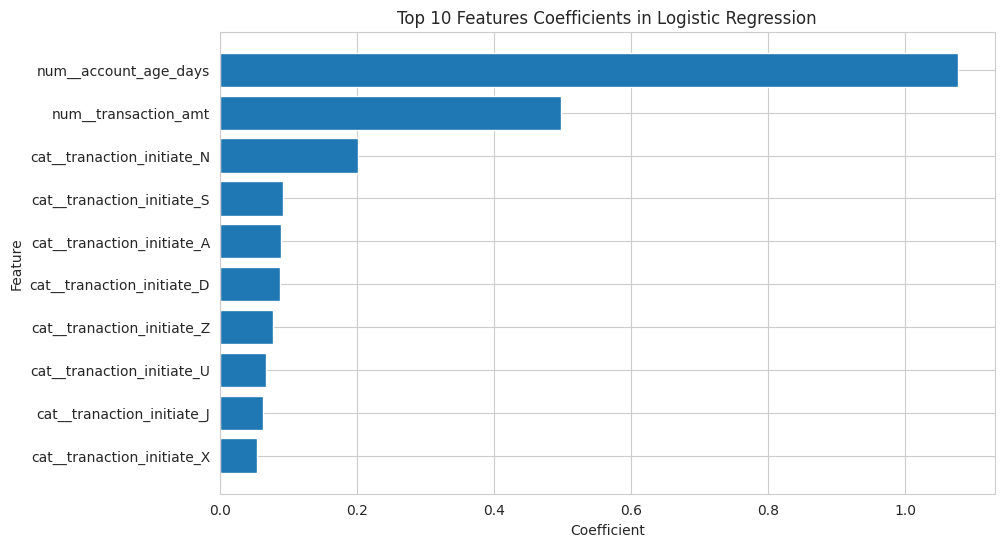

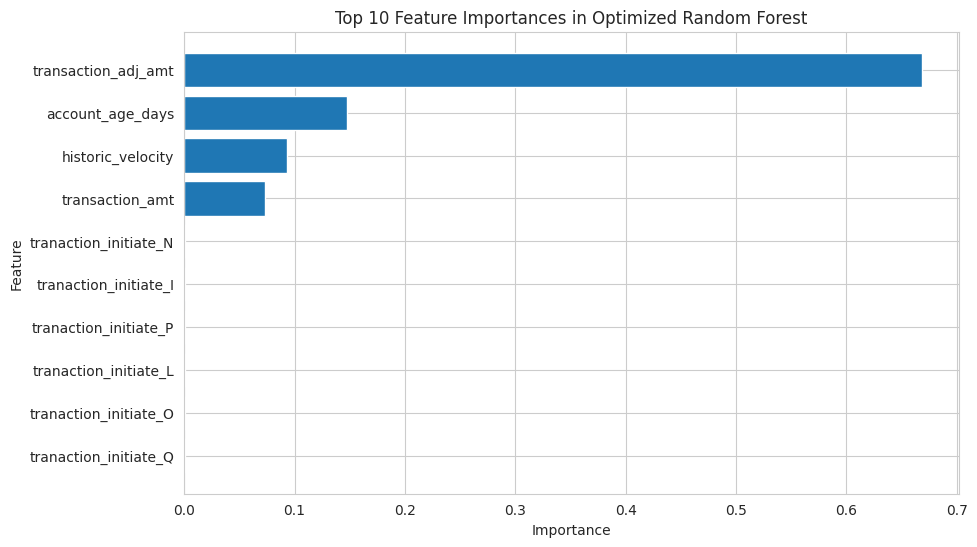

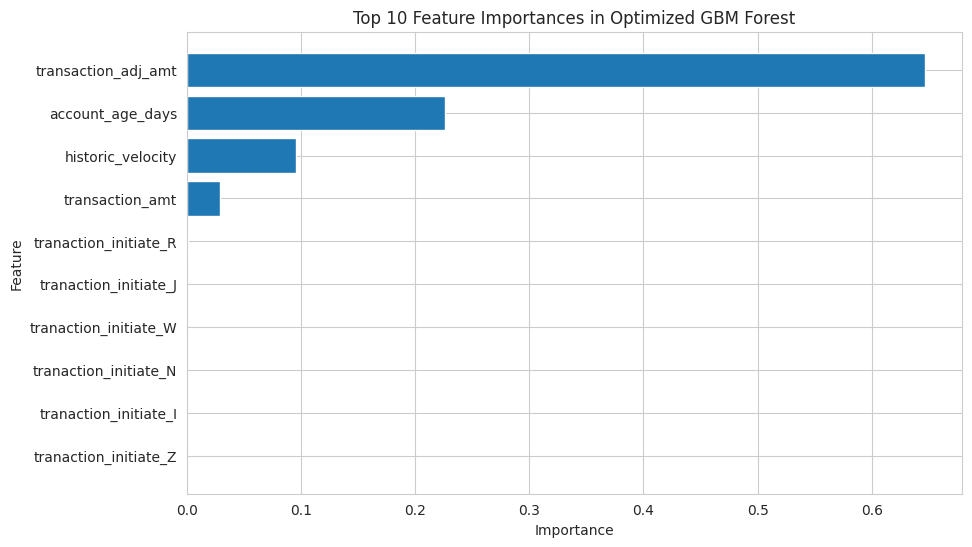

In [39]:
import matplotlib.pyplot as plt

# Plot for Logistic Regression
plt.figure(figsize=(10, 6))
plt.title('Top 10 Features Coefficients in Logistic Regression')
plt.barh(lr_feature_importance_df['Feature'][:10], lr_feature_importance_df['Coefficient'][:10])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# Plot for Optimized Random Forest
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances in Optimized Random Forest')
plt.barh(rf_feature_importance_df['Feature'][:10], rf_feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# Plot for Optimized GBM
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances in Optimized GBM Forest')
plt.barh(gbm_feature_importance_df['Feature'][:10], gbm_feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

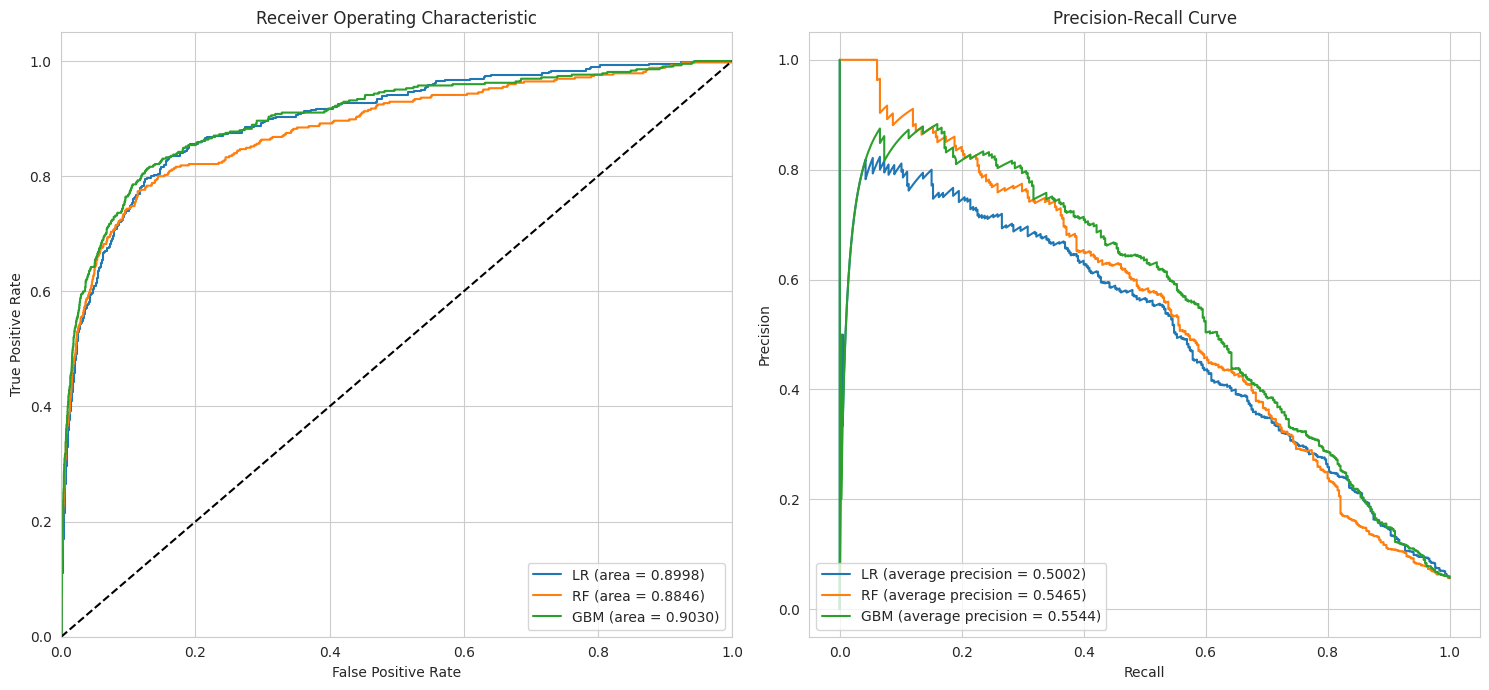

In [43]:
model_set = {
    "LR": lr_pipeline,
    "RF": rf_pipeline_hpo,
    "GBM": gbm_pipeline_hpo}


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split

def plot_model_curves(model_set, X, y):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    plt.figure(figsize=(15, 7))

    # ROC Curve plot
    plt.subplot(1, 2, 1)
    for name, model in model_set.items():
        # Fit the model
        model.fit(X_train, y_train)
        # Get predicted probabilities
        y_score = model.predict_proba(X_test)[:, 1]
        # Compute ROC curve and ROC area
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        # Plot
        plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.4f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    # PR Curve plot
    plt.subplot(1, 2, 2)
    for name, model in model_set.items():
        # Get predicted probabilities
        y_score = model.predict_proba(X_test)[:, 1]
        # Compute PR curve and PR area
        precision, recall, _ = precision_recall_curve(y_test, y_score)
        average_precision = average_precision_score(y_test, y_score)
        # Plot
        plt.plot(recall, precision, label=f'{name} (average precision = {average_precision:.4f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.show()

# Example usage:
model_set = {
    "LR": lr_pipeline,
    "RF": rf_pipeline_hpo,
    "GBM": gbm_pipeline_hpo}

#plot_model_curves(model_set, test[numeric_features], test['riskperformance_target'])

plot_model_curves(model_set, X_test, y_test)

#Which is Best Model?

In [77]:
#paste eval metrics of lr, optimized rf and gbm

print(f"Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions):.4f}")
print(f"  AUC: {roc_auc_score(y_test, lr_predictions):.4f}")
print(f"  Precision: {precision_score(y_test, lr_predictions):.4f}")
print(f"  Recall: {recall_score(y_test, lr_predictions):.4f}")
print(f"  F1: {f1_score(y_test, lr_predictions):.4f}")
print("\n -------- \n")
print("Random Forest Model Optimized:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rf_hpo):.4f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_rf_hpo):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_rf_hpo):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_rf_hpo):.4f}")
print(f"  F1: {f1_score(y_test, y_pred_rf_hpo):.4f}")
print("\n -------- ")
print("GBM Optimized:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_gbm_hpo):.4f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_gbm_hpo):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_gbm_hpo):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_gbm_hpo):.4f}")
print(f"  F1: {f1_score(y_test, y_pred_gbm_hpo):.4f}")

Logistic Regression:
Accuracy: 0.9566
  AUC: 0.6570
  Precision: 0.7424
  Recall: 0.3204
  F1: 0.4476

 -------- 

Random Forest Model Optimized:
  Accuracy: 0.9569
  AUC: 0.9088
  Precision: 0.8488
  Recall: 0.2617
  F1: 0.4000

 -------- 
GBM Optimized:
  Accuracy: 0.9610
  AUC: 0.9158
  Precision: 0.7540
  Recall: 0.4301
  F1: 0.5478


#Apply best model to holdout set

In [78]:
#import zipfile

# Unzip the file
#with zipfile.ZipFile('/content/project_2_training.csv.zip', 'r') as zip_ref:
#    zip_ref.extractall('')

# Load the dataset
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning- S3/Project 2- Finding Fraud/project_2_holdout.csv')

# Display the first few rows of the dataframe
df2.head()

,EVENT_ID,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,...,transaction_type,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount
0,109420,4462,3648,54,6325,197.108.209.59,Opera/8.29.(X11; Linux i686; mk-MK) Presto/2.9...,perez-smith.org,+1-776-557-7526x274,Danielville,...,D,G,3/28/21 22:17,Mrs. Dawn Murray,414 Gregory Mountains Suite 443,618-52-2474,gd_GB,O,23.0,2422.0
1,1049060,3360,2180,54,4030,178.166.190.20,Opera/8.16.(X11; Linux i686; is-IS) Presto/2.9...,morris-diaz.com,001-427-310-1481x093,Thompsonshire,...,D,F,5/29/21 6:26,William Hughes,67405 Higgins Ways,651-14-8114,iu_CA,U,58.0,2160.0
2,2805320,4725,2063,60,4372,163.48.86.34,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.5.20) G...,campos-brown.net,073.152.2261,North Lisaburgh,...,U,Z,3/17/21 7:35,Jennifer Johnson,41514 Toni Junction Suite 866,824-13-0148,yue_HK,O,34.0,14474.0
3,450840,5336,2319,72,4385,55.233.5.10,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10 1...,hanna-taylor.com,835-295-8283x42594,Joelville,...,X,W,4/26/21 5:34,Brenda Hopkins,1991 Angela Falls,633-56-8621,sa_IN,Y,84.0,13297.0
4,423160,6115,3413,61,5942,119.228.12.223,Opera/8.21.(X11; Linux i686; cv-RU) Presto/2.9...,gregory.com,424.203.8183,Hallburgh,...,D,W,1/17/21 13:25,Patricia Davis,57145 Walton Valleys Suite 250,636-15-1188,doi_IN,I,89.0,5425.0


In [84]:
pred = gbm_pipeline_hpo.predict_proba(df2)[:,1]

In [85]:
holdout_submission = df2[['EVENT_ID']].copy()
holdout_submission['EVENT_LABEL'] = pred
holdout_submission

,EVENT_ID,EVENT_LABEL
0,109420,0.015696
1,1049060,0.004475
2,2805320,0.004280
3,450840,0.004622
4,423160,0.015233
...,...,...
24995,1946880,0.003546
24996,1744520,0.028641
24997,432200,0.087702
24998,1082260,0.005192


In [86]:
holdout_submission.to_csv('holdout_submission.csv', index=False)

#To HTML

In [3]:
#Convert to HTML
%%shell
jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Machine Learning- S3/Project 2- Finding Fraud/Project_2_Baldis.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Machine Learning- S3/Project 2- Finding Fraud/Project_2_Baldis.ipynb to html
[NbConvertApp] Writing 2014426 bytes to /content/drive/MyDrive/Colab Notebooks/Machine Learning- S3/Project 2- Finding Fraud/Project_2_Baldis.html
